In [1]:
"""# Import libraries"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

"""# import dataset"""
df = pd.read_csv('D:\Desktop\Project\FlightSalesClean.csv')
print('loading Dataset Compelete!')

loading Dataset Compelete!


In [2]:
q7_df = df[['request_date_id', 'departure_date_id']]

"""# change column to timedelta pandas format and calculate the difference"""
# set the correct format of dataframe
q7_df['request_date_id'] = pd.to_datetime(q7_df['request_date_id'], format="%Y%m%d")

''' Remove departure_date_id with the zero value '''
q7_df = q7_df[q7_df.departure_date_id != 0]
q7_df['departure_date_id'] = pd.to_datetime(q7_df['departure_date_id'], format="%Y%m%d")

''' Difference between request date and departure time '''
q7_df['difference'] = q7_df['departure_date_id'] - q7_df['request_date_id']
q7_df

"""# User behavior in different months"""
# date to week days
q7_df['month_of_year'] = q7_df['request_date_id'].dt.month_name()
q7_df

"""# Difference column to int"""
q7_df['difference'] = round(q7_df['difference'].dt.days / 1, 1)
q7_df

months_frequency = q7_df.groupby(['month_of_year']).mean()
months_frequency


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,difference
month_of_year,
April,5.186484
August,7.090592
December,5.724421
February,9.191735
January,7.251441
July,5.764160
June,5.856776
March,7.113529
May,5.273851


In [3]:

# get just the hours number 
months = months_frequency.index
request_month_list = []
for i in range(len(months)):
    item = str(months[i])
    request_month_list.append(item)
    

request_month_list = np.array(request_month_list)  # list to numpy array

frequenceis = months_frequency.to_numpy() # list to numpy array

requests_frequencies_zip = list(zip(request_month_list, frequenceis))

requests_frequencies_zip = sorted(requests_frequencies_zip, key=lambda x: x[1]) # sort by hour

requests_frequencies_dict = {} # dictionary of items

for i in range(len(requests_frequencies_zip)):
    requests_frequencies_dict[requests_frequencies_zip[i][0]] = float(requests_frequencies_zip[i][1])
list_to_plot_x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
list_to_plot_y = []
for item in list_to_plot_x:
    list_to_plot_y.append(requests_frequencies_dict[item])


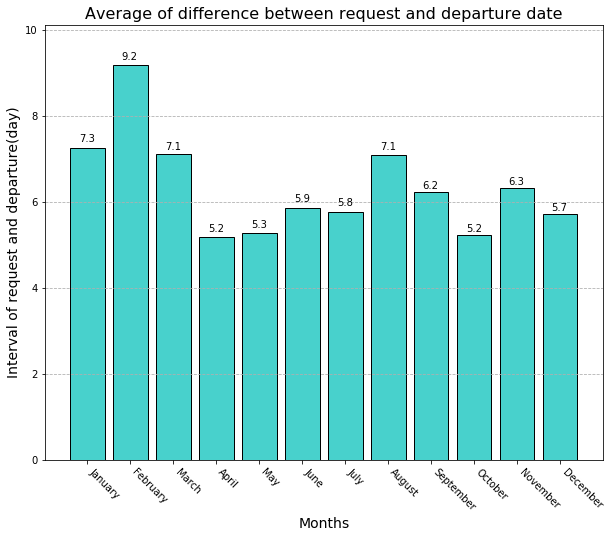

In [4]:
# plot
plt.bar(list_to_plot_x, list_to_plot_y, color = 'mediumturquoise', edgecolor = 'black')
plt.xticks(rotation=-45, ha='left')
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.title('Average of difference between request and departure date', fontsize = 16)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Interval of request and departure(day)', fontsize = 14)
plt.gcf().set_size_inches(10,8)
plt.ylim([0, max(list_to_plot_y)*1.1])
list_to_plot_y = np.around(list_to_plot_y, 1)
for i, v in enumerate(list_to_plot_y):
    plt.text(i-0.2, v+0.1, str(v), color='black')
plt.show()